In [2]:
import numpy as np
from numpy import random as rd
import time
from solvers_listos import *
from funciones import *

In [3]:
%run politica_R.ipynb
%run politica_P.ipynb
# hay que ver qué onda este print

{0: 0, 1: 91, 2: 27, 3: 11, 4: 63, 5: 69, 6: 67, 7: 91, 8: 46, 9: 73, 10: 66}


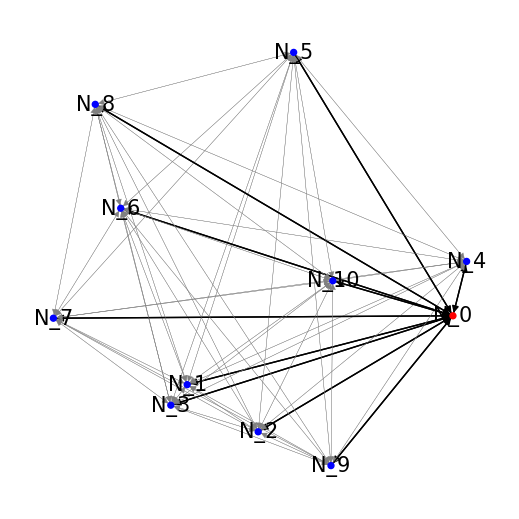

In [4]:
G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= 'IRP1.xlsx' ,plot=True)
historia = simular_demanda_previa(G, dist = 'n', T=1000) 

In [5]:
rutas_R, perdidas_R, inventarios_R = simular_ejecucion_R(grafo_inicial = G, dem_historico = historia, capacidad = cap_tpte, T = 60)

Inventario inicial: 
N_0 1428
N_1 87
N_2 27
N_3 20
N_4 55
N_5 142
N_6 69
N_7 158
N_8 86
N_9 77
N_10 126


No hay locales que visitar
Ruta 1:  ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0']
Ruta 2:  ['N_0', 'N_1', 'N_0']
Ruta 3:  ['N_0', 'N_4', 'N_9', 'N_2', 'N_3', 'N_6', 'N_8', 'N_5', 'N_0']
Ruta 4:  ['N_0', 'N_4', 'N_10', 'N_2', 'N_1', 'N_7', 'N_0']
Ruta 5:  ['N_0', 'N_4', 'N_9', 'N_2', 'N_3', 'N_6', 'N_0']
Ruta 6:  ['N_0', 'N_4', 'N_10', 'N_2', 'N_1', 'N_8', 'N_5', 'N_0']
Ruta 7:  ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_7', 'N_6', 'N_0']
Ruta 8:  ['N_0', 'N_4', 'N_10', 'N_3', 'N_8', 'N_0']
Ruta 9:  ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_7', 'N_6', 'N_5', 'N_0']
Ruta 10:  ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_3', 'N_0']
Ruta 11:  ['N_0', 'N_4', 'N_10', 'N_1', 'N_6', 'N_8', 'N_5', 'N_0']
Ruta 12:  ['N_0', 'N_4', 'N_9', 'N_2', 'N_7', 'N_0']
Ruta 13:  ['N_0', 'N_10', 'N_1', 'N_3', 'N_6', 'N_8', 'N_5', 'N_0']
Ruta 14:  ['N_0', 'N_4', 'N_9', 'N_2', 'N

In [6]:
rutas_P, perdidas_P, inventarios_P = simular_ejecucion_P_LS(grafo_inicial = G, dem_historico= historia, T = 60, F = 10, cap = 871)

Tiempo: 0 | Ruta: [] | costo_SO: 244950.405039907 | costo_r: 0
Tiempo: 1 | Ruta: ['N_0', 'N_10', 'N_2', 'N_4', 'N_6', 'N_8', 'N_3', 'N_7', 'N_5', 'N_0'] | costo_SO: 153767.91359956292 | costo_r: 1780.4065237216564
Tiempo: 2 | Ruta: ['N_0', 'N_9', 'N_0'] | costo_SO: 150795.7306750849 | costo_r: 182.5705343148231
Tiempo: 3 | Ruta: ['N_0', 'N_4', 'N_10', 'N_2', 'N_1', 'N_0'] | costo_SO: 149414.06784707707 | costo_r: 432.0048199074118
Tiempo: 4 | Ruta: ['N_0', 'N_4', 'N_7', 'N_9', 'N_3', 'N_6', 'N_8', 'N_5', 'N_0'] | costo_SO: 80652.50283171287 | costo_r: 1499.9928111352028
Tiempo: 5 | Ruta: ['N_0', 'N_9', 'N_1', 'N_7', 'N_0'] | costo_SO: 26169.942839689455 | costo_r: 511.14151988724916
Tiempo: 6 | Ruta: ['N_0', 'N_4', 'N_10', 'N_7', 'N_5', 'N_6', 'N_0'] | costo_SO: 130887.86995660473 | costo_r: 1077.168599969498
Tiempo: 7 | Ruta: ['N_0', 'N_9', 'N_2', 'N_8', 'N_0'] | costo_SO: 99179.65261764702 | costo_r: 592.1089402045056
Tiempo: 8 | Ruta: ['N_0', 'N_4', 'N_10', 'N_1', 'N_3', 'N_0'] | co

In [ ]:
mis_rutas
mis_rutas_t = {t : str(mis_rutas[t]) for t in mis_rutas.keys()}
df_rutas = pd.DataFrame.from_dict(mis_rutas_t, orient='index', columns=['Ruta'])
df_rutas.value_counts()



N = len(G.nodes())-1
df = generar_df(mis_rutas, N)
df['sum'] = df.sum(axis=1)


In [ ]:
df_nodos = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
df_nodos = df_nodos.iloc[1:]
df_nodos['frec'] = (df.describe()).T['mean']
dem_historico_media = {nodo: np.mean(historia[nodo]) for nodo in historia.keys()}
df_nodos['dem_mean'] = dem_historico_media.values()
df_nodos

In [ ]:
plt.figure(figsize=(21, 7))
plt.plot(df['sum'], '-', color='black')
plt.xlabel('Días')
plt.ylabel('Locales visitados')
plt.title('Locales visitados por día')
plt.show()

In [ ]:
plotear_tablero_visitas(df, guardar = True, nombre = 'plots//tablero_PRO_n30_orig.png')

In [ ]:
cantidad_06 = len(df_nodos[df_nodos['frec'] >= 0.5])
cantidad_04 = len(df_nodos[df_nodos['frec'] < 0.5])

print (f'Locales visitados más de 50% de los días: {cantidad_06}, que corresponde a un {cantidad_06/N*100}%')
print (f'Locales visitados menos de 50% de los días: {cantidad_04}, que corresponde a un {cantidad_04/N*100}%')

In [ ]:
datos = dispersion_intervalos(df)
        
df_nodos['mean'] = datos['mean']
df_nodos['std'] = datos['std']
df_nodos['porcentaje demanda'] = df_nodos['dem_mean'] / df_nodos['Up']
df_nodos['porcentaje dem. inicial'] = df_nodos['Prod'] / df_nodos['Up']
df_nodos_corr = df_nodos[['Inv','Up','Low','Prod','h','frec','mean','std','dem_mean','porcentaje demanda','porcentaje dem. inicial']]
df_nodos

In [ ]:
df_nodos_corr.corr()

Inventario inicial: 
N_0 1428
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0


Ruta 0:  ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0']
Ruta 1:  ['N_0', 'N_2', 'N_1', 'N_0']
Ruta 2:  ['N_0', 'N_4', 'N_9', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0']
Ruta 3:  ['N_0', 'N_10', 'N_2', 'N_6', 'N_0']
Ruta 4:  ['N_0', 'N_4', 'N_9', 'N_1', 'N_3', 'N_6', 'N_0']
Ruta 5:  ['N_0', 'N_2', 'N_1', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0']
Ruta 6:  ['N_0', 'N_4', 'N_10', 'N_9', 'N_0']
Ruta 7:  ['N_0', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_5', 'N_0']
Ruta 8:  ['N_0', 'N_4', 'N_9', 'N_6', 'N_8', 'N_7', 'N_0']
Ruta 9:  ['N_0', 'N_10', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0']
Ruta 10:  ['N_0', 'N_4', 'N_9', 'N_1', 'N_3', 'N_6', 'N_8', 'N_5', 'N_0']
Ruta 11:  ['N_0', 'N_10', 'N_2', 'N_1', 'N_7', 'N_6', 'N_0']
Ruta 12:  ['N_0', 'N_4', 'N_9', 'N_6', 'N_0']
Ruta 13:  ['N_0', 'N_4', 'N_5', 'N_8', 'N_7', 'N_3', 'N_1', 'N_2', 'N_0']
Ruta 14:  ['N_0', 'N_10', 'N_9', 'N_2

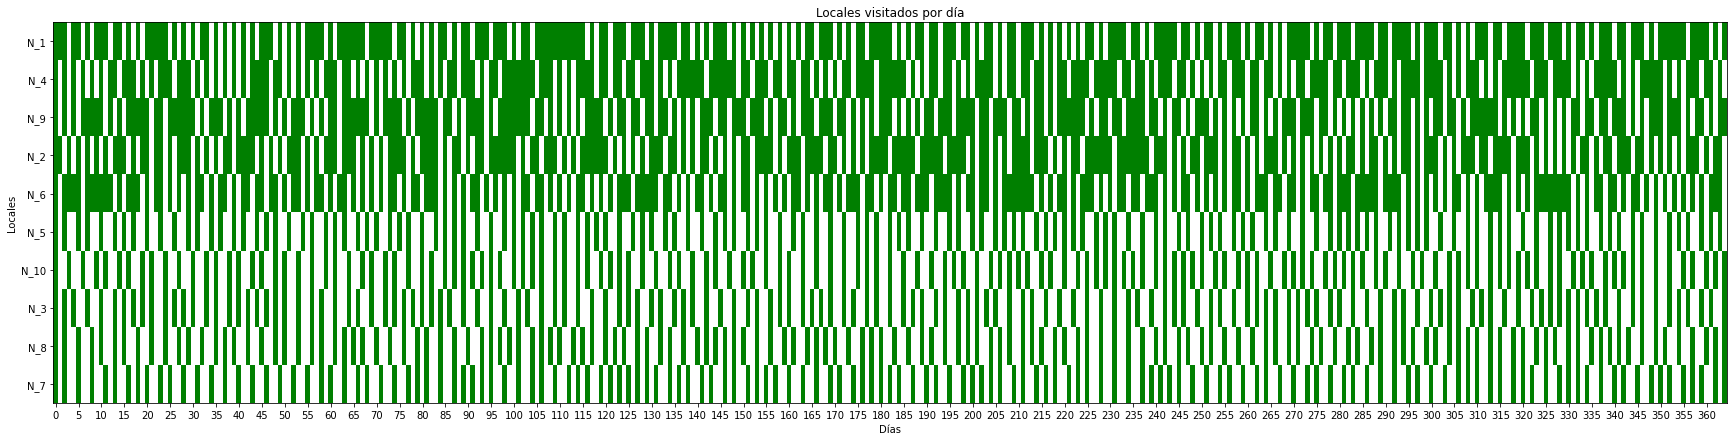

Listo n10empty.xlsx
Inventario inicial: 
N_0 1428
N_1 87
N_2 27
N_3 20
N_4 55
N_5 142
N_6 69
N_7 158
N_8 86
N_9 77
N_10 126


No hay locales que visitar
Ruta 1:  ['N_0', 'N_4', 'N_10', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_5', 'N_0']
Ruta 2:  ['N_0', 'N_9', 'N_2', 'N_6', 'N_8', 'N_7', 'N_0']
Ruta 3:  ['N_0', 'N_4', 'N_5', 'N_1', 'N_3', 'N_2', 'N_0']
Ruta 4:  ['N_0', 'N_9', 'N_10', 'N_6', 'N_0']
Ruta 5:  ['N_0', 'N_4', 'N_5', 'N_8', 'N_7', 'N_3', 'N_1', 'N_2', 'N_0']
Ruta 6:  ['N_0', 'N_9', 'N_2', 'N_10', 'N_6', 'N_0']
Ruta 7:  ['N_0', 'N_4', 'N_2', 'N_1', 'N_6', 'N_0']
Ruta 8:  ['N_0', 'N_4', 'N_9', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0']
Ruta 9:  ['N_0', 'N_10', 'N_9', 'N_2', 'N_6', 'N_0']
Ruta 10:  ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_3', 'N_7', 'N_0']
Ruta 11:  ['N_0', 'N_4', 'N_9', 'N_6', 'N_8', 'N_5', 'N_0']
Ruta 12:  ['N_0', 'N_10', 'N_9', 'N_2', 'N_1', 'N_7', 'N_0']
Ruta 13:  ['N_0', 'N_4', 'N_9', 'N_3', 'N_6', 'N_5', 'N_0']
Ruta 14:  ['N_0', 'N_9', 'N_2', 'N_1', 'N_7

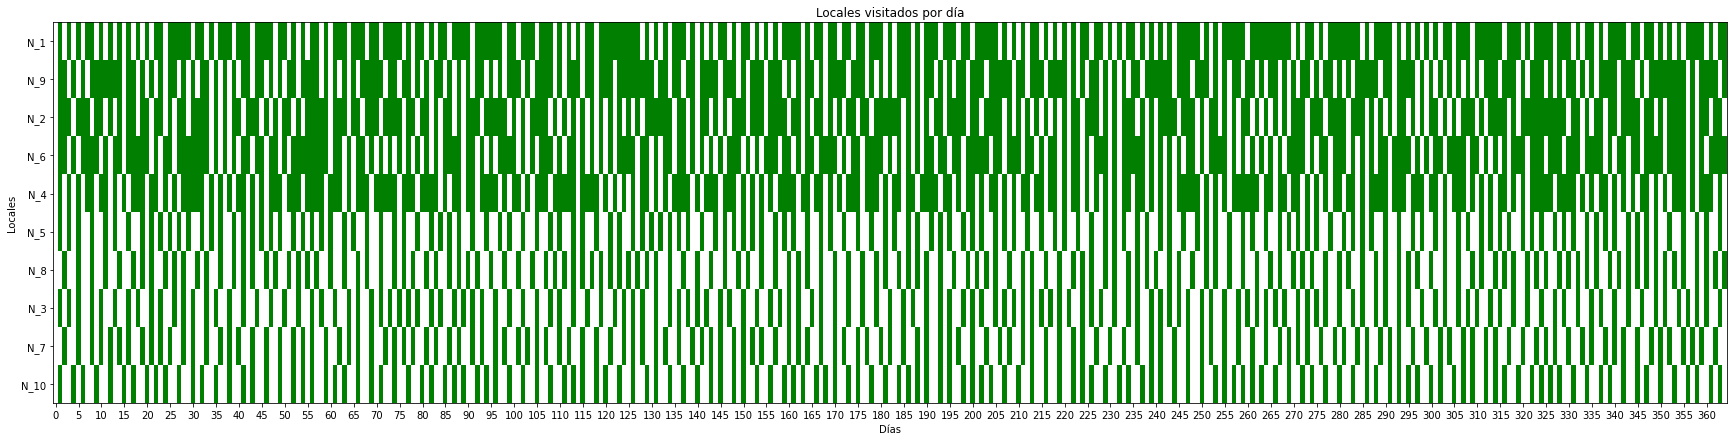

Listo n10estandar.xlsx
Inventario inicial: 
N_0 1428
N_1 174
N_2 54
N_3 30
N_4 110
N_5 213
N_6 138
N_7 237
N_8 129
N_9 154
N_10 189


No hay locales que visitar
Ruta 1:  ['N_0', 'N_9', 'N_0']
Ruta 2:  ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_8', 'N_5', 'N_0']
Ruta 3:  ['N_0', 'N_4', 'N_10', 'N_2', 'N_1', 'N_7', 'N_0']
Ruta 4:  ['N_0', 'N_4', 'N_9', 'N_6', 'N_0']
Ruta 5:  ['N_0', 'N_2', 'N_1', 'N_3', 'N_8', 'N_5', 'N_0']
Ruta 6:  ['N_0', 'N_4', 'N_10', 'N_9', 'N_6', 'N_7', 'N_0']
Ruta 7:  ['N_0', 'N_4', 'N_2', 'N_1', 'N_3', 'N_6', 'N_8', 'N_0']
Ruta 8:  ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_6', 'N_5', 'N_0']
Ruta 9:  ['N_0', 'N_10', 'N_2', 'N_1', 'N_3', 'N_7', 'N_8', 'N_0']
Ruta 10:  ['N_0', 'N_4', 'N_9', 'N_2', 'N_6', 'N_0']
Ruta 11:  ['N_0', 'N_9', 'N_2', 'N_3', 'N_1', 'N_5', 'N_0']
Ruta 12:  ['N_0', 'N_4', 'N_10', 'N_8', 'N_6', 'N_7', 'N_0']
Ruta 13:  ['N_0', 'N_4', 'N_9', 'N_2', 'N_1', 'N_5', 'N_0']
Ruta 14:  ['N_0', 'N_4', 'N_10', 'N_1', 'N_3', 'N_6', 'N_8', 'N_0']
Rut

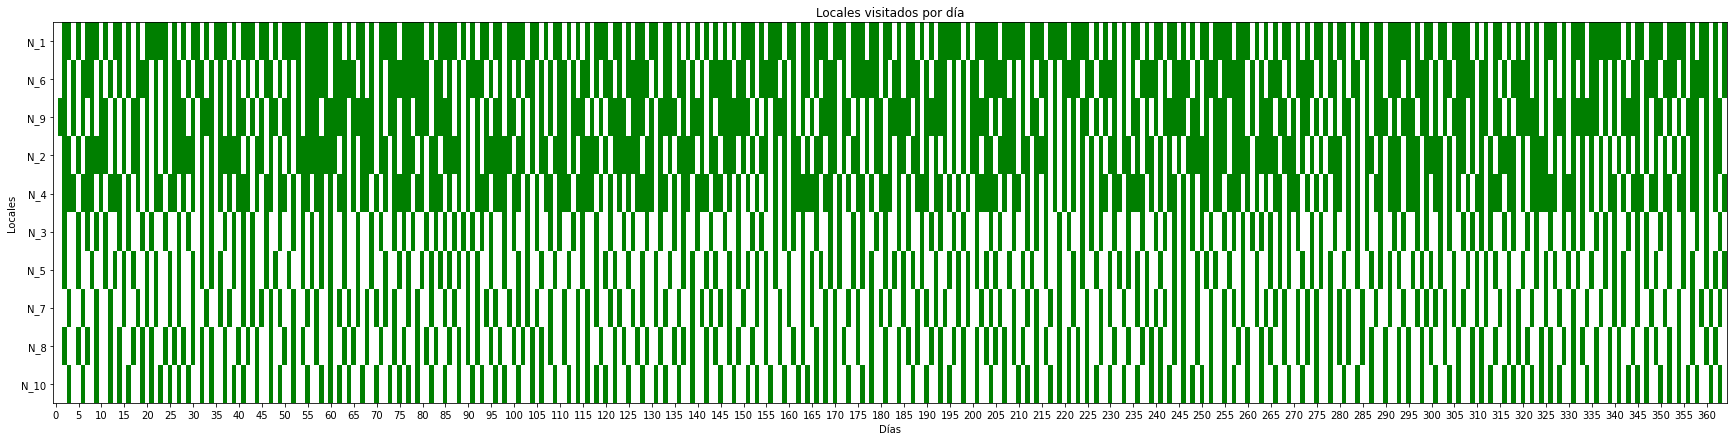

Listo n10full.xlsx
Inventario inicial: 
N_0 nan
N_1 0.0
N_2 0.0
N_3 0.0
N_4 0.0
N_5 0.0
N_6 0.0
N_7 0.0
N_8 0.0
N_9 0.0
N_10 0.0
N_11 0.0
N_12 0.0
N_13 0.0
N_14 0.0
N_15 0.0
N_16 0.0
N_17 0.0
N_18 0.0
N_19 0.0
N_20 0.0


Ruta 0:  ['N_0', 'N_3', 'N_6', 'N_16', 'N_12', 'N_19', 'N_18', 'N_17', 'N_1', 'N_2', 'N_13', 'N_20', 'N_8', 'N_11', 'N_9', 'N_10', 'N_7', 'N_14', 'N_15', 'N_4', 'N_5', 'N_0']
Ruta 1:  ['N_0', 'N_6', 'N_11', 'N_8', 'N_18', 'N_0']
Ruta 2:  ['N_0', 'N_3', 'N_7', 'N_15', 'N_10', 'N_9', 'N_6', 'N_16', 'N_17', 'N_1', 'N_2', 'N_13', 'N_0']
Ruta 3:  ['N_0', 'N_9', 'N_11', 'N_4', 'N_5', 'N_20', 'N_8', 'N_18', 'N_16', 'N_19', 'N_12', 'N_14', 'N_0']
Ruta 4:  ['N_0', 'N_6', 'N_17', 'N_1', 'N_2', 'N_8', 'N_11', 'N_9', 'N_10', 'N_15', 'N_7', 'N_0']
Ruta 5:  ['N_0', 'N_6', 'N_11', 'N_13', 'N_8', 'N_18', 'N_16', 'N_19', 'N_12', 'N_3', 'N_10', 'N_7', 'N_0']
Ruta 6:  ['N_0', 'N_17', 'N_18', 'N_1', 'N_20', 'N_5', 'N_4', 'N_9', 'N_6', 'N_10', 'N_15', 'N_7', 'N_14', 'N_0']
Ruta 7:  ['N_0',

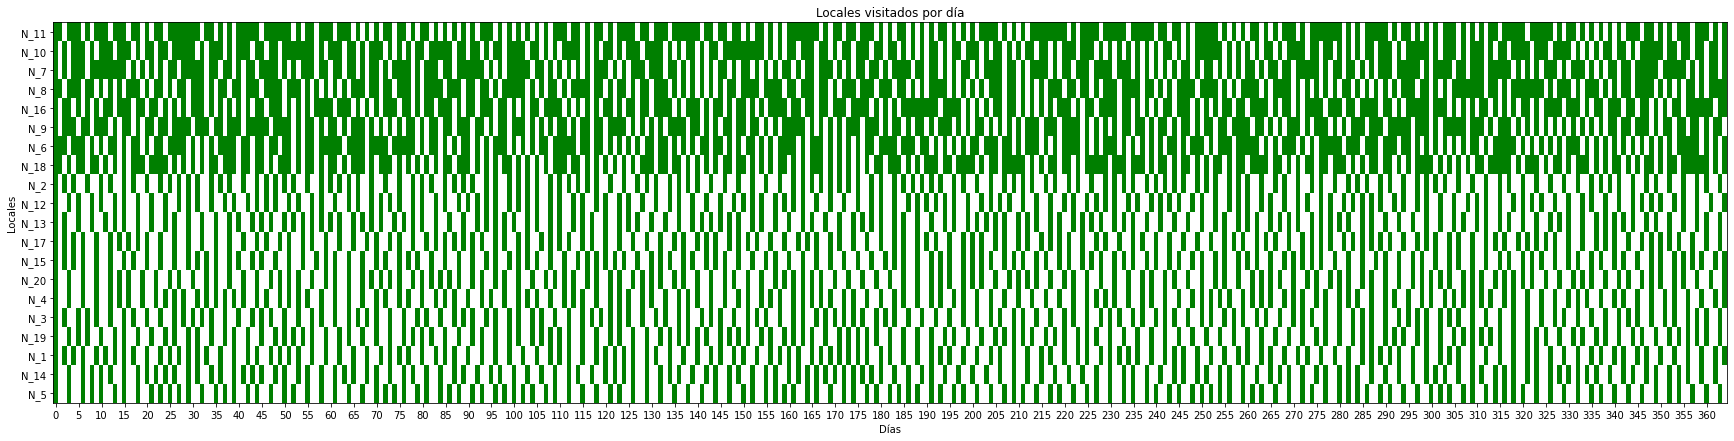

Listo n20empty.xlsx
Inventario inicial: 
N_0 nan
N_1 28.0
N_2 166.0
N_3 166.0
N_4 162.0
N_5 148.0
N_6 69.0
N_7 21.0
N_8 11.0
N_9 33.0
N_10 84.0
N_11 92.0
N_12 62.0
N_13 168.0
N_14 88.0
N_15 74.0
N_16 77.0
N_17 84.0
N_18 76.0
N_19 120.0
N_20 32.0


No hay locales que visitar
Ruta 1:  ['N_0', 'N_3', 'N_7', 'N_10', 'N_4', 'N_5', 'N_13', 'N_20', 'N_8', 'N_11', 'N_9', 'N_6', 'N_16', 'N_19', 'N_18', 'N_0']
Ruta 2:  ['N_0', 'N_12', 'N_17', 'N_1', 'N_2', 'N_8', 'N_10', 'N_15', 'N_7', 'N_14', 'N_0']
Ruta 3:  ['N_0', 'N_3', 'N_10', 'N_6', 'N_9', 'N_11', 'N_4', 'N_5', 'N_13', 'N_20', 'N_8', 'N_16', 'N_19', 'N_18', 'N_0']
Ruta 4:  ['N_0', 'N_6', 'N_1', 'N_16', 'N_12', 'N_7', 'N_0']
Ruta 5:  ['N_0', 'N_17', 'N_18', 'N_2', 'N_8', 'N_11', 'N_9', 'N_10', 'N_15', 'N_14', 'N_0']
Ruta 6:  ['N_0', 'N_3', 'N_6', 'N_11', 'N_4', 'N_5', 'N_13', 'N_20', 'N_18', 'N_16', 'N_19', 'N_7', 'N_0']
Ruta 7:  ['N_0', 'N_12', 'N_1', 'N_8', 'N_11', 'N_9', 'N_10', 'N_15', 'N_0']
Ruta 8:  ['N_0', 'N_6', 'N_11', 'N_20', 'N_1

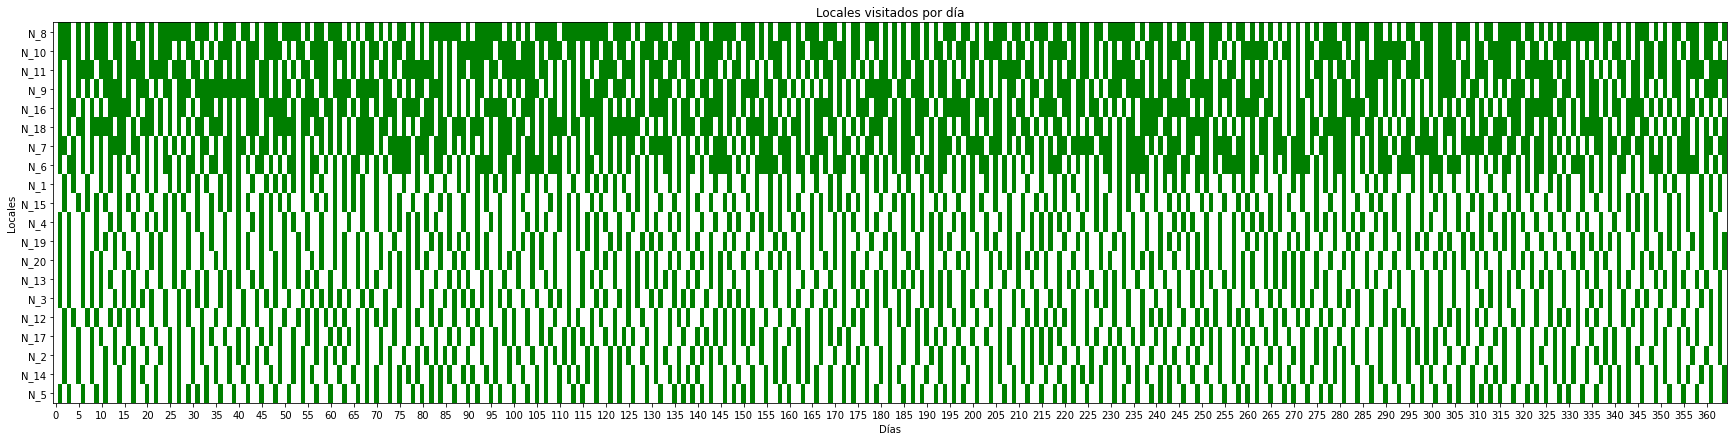

Listo n20estandar.xlsx
Inventario inicial: 
N_0 nan
N_1 42.0
N_2 249.0
N_3 249.0
N_4 243.0
N_5 222.0
N_6 138.0
N_7 42.0
N_8 22.0
N_9 66.0
N_10 168.0
N_11 184.0
N_12 93.0
N_13 252.0
N_14 132.0
N_15 111.0
N_16 154.0
N_17 126.0
N_18 152.0
N_19 180.0
N_20 48.0


No hay locales que visitar
Ruta 1:  ['N_0', 'N_9', 'N_18', 'N_0']
Ruta 2:  ['N_0', 'N_7', 'N_10', 'N_4', 'N_5', 'N_13', 'N_20', 'N_8', 'N_11', 'N_9', 'N_6', 'N_16', 'N_19', 'N_18', 'N_0']
Ruta 3:  ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_2', 'N_1', 'N_17', 'N_18', 'N_16', 'N_12', 'N_3', 'N_14', 'N_15', 'N_0']
Ruta 4:  ['N_0', 'N_6', 'N_11', 'N_8', 'N_20', 'N_5', 'N_4', 'N_10', 'N_7', 'N_0']
Ruta 5:  ['N_0', 'N_9', 'N_11', 'N_8', 'N_13', 'N_1', 'N_17', 'N_18', 'N_16', 'N_19', 'N_12', 'N_3', 'N_14', 'N_0']
Ruta 6:  ['N_0', 'N_6', 'N_9', 'N_11', 'N_8', 'N_16', 'N_18', 'N_2', 'N_5', 'N_10', 'N_15', 'N_7', 'N_0']
Ruta 7:  ['N_0', 'N_9', 'N_11', 'N_4', 'N_13', 'N_20', 'N_12', 'N_3', 'N_14', 'N_0']
Ruta 8:  ['N_0', 'N_6', 'N_17', 'N_16', '

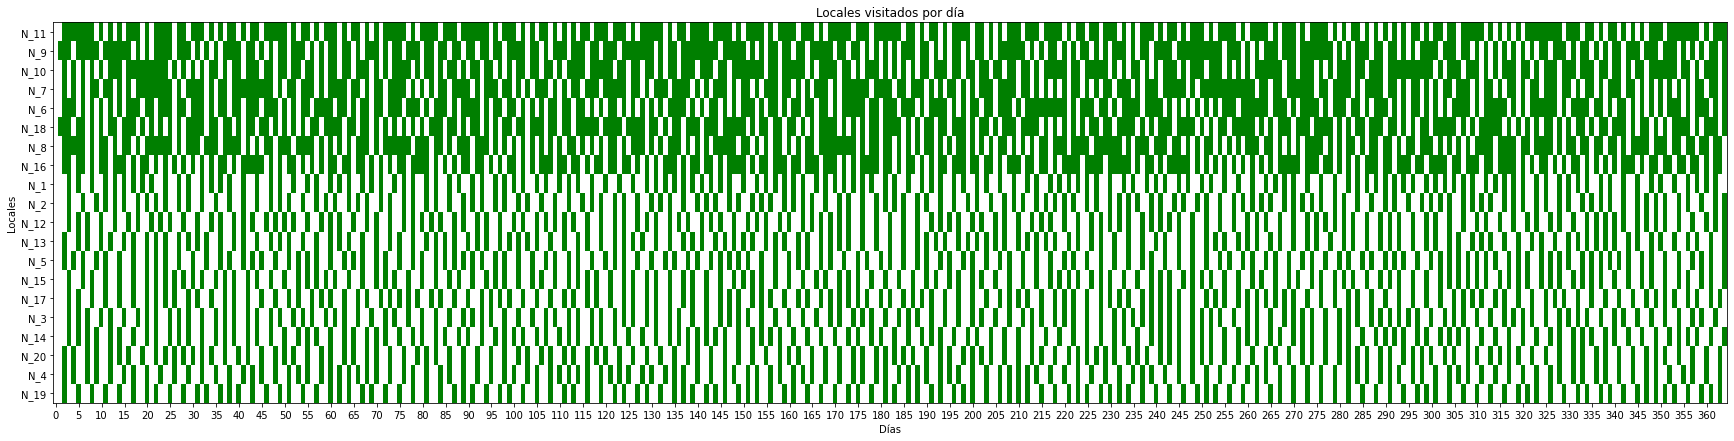

Listo n20full.xlsx
Inventario inicial: 
N_0 3773
N_1 0
N_2 0
N_3 0
N_4 0
N_5 0
N_6 0
N_7 0
N_8 0
N_9 0
N_10 0
N_11 0
N_12 0
N_13 0
N_14 0
N_15 0
N_16 0
N_17 0
N_18 0
N_19 0
N_20 0
N_21 0
N_22 0
N_23 0
N_24 0
N_25 0
N_26 0
N_27 0
N_28 0
N_29 0
N_30 0


Ruta 0:  ['N_0', 'N_24', 'N_20', 'N_26', 'N_1', 'N_10', 'N_7', 'N_23', 'N_6', 'N_17', 'N_15', 'N_30', 'N_28', 'N_11', 'N_3', 'N_5', 'N_12', 'N_27', 'N_18', 'N_21', 'N_22', 'N_4', 'N_13', 'N_29', 'N_2', 'N_9', 'N_8', 'N_14', 'N_19', 'N_25', 'N_16', 'N_0']
Ruta 1:  ['N_0', 'N_24', 'N_1', 'N_10', 'N_28', 'N_9', 'N_2', 'N_4', 'N_0']
Ruta 2:  ['N_0', 'N_1', 'N_10', 'N_7', 'N_11', 'N_3', 'N_30', 'N_17', 'N_27', 'N_22', 'N_29', 'N_8', 'N_14', 'N_19', 'N_25', 'N_6', 'N_16', 'N_0']
Ruta 3:  ['N_0', 'N_24', 'N_26', 'N_20', 'N_28', 'N_15', 'N_12', 'N_5', 'N_18', 'N_2', 'N_21', 'N_29', 'N_4', 'N_13', 'N_9', 'N_19', 'N_16', 'N_23', 'N_10', 'N_0']
Ruta 4:  ['N_0', 'N_24', 'N_11', 'N_3', 'N_27', 'N_2', 'N_8', 'N_16', 'N_19', 'N_25', 'N_6', 'N_30', 'N_28

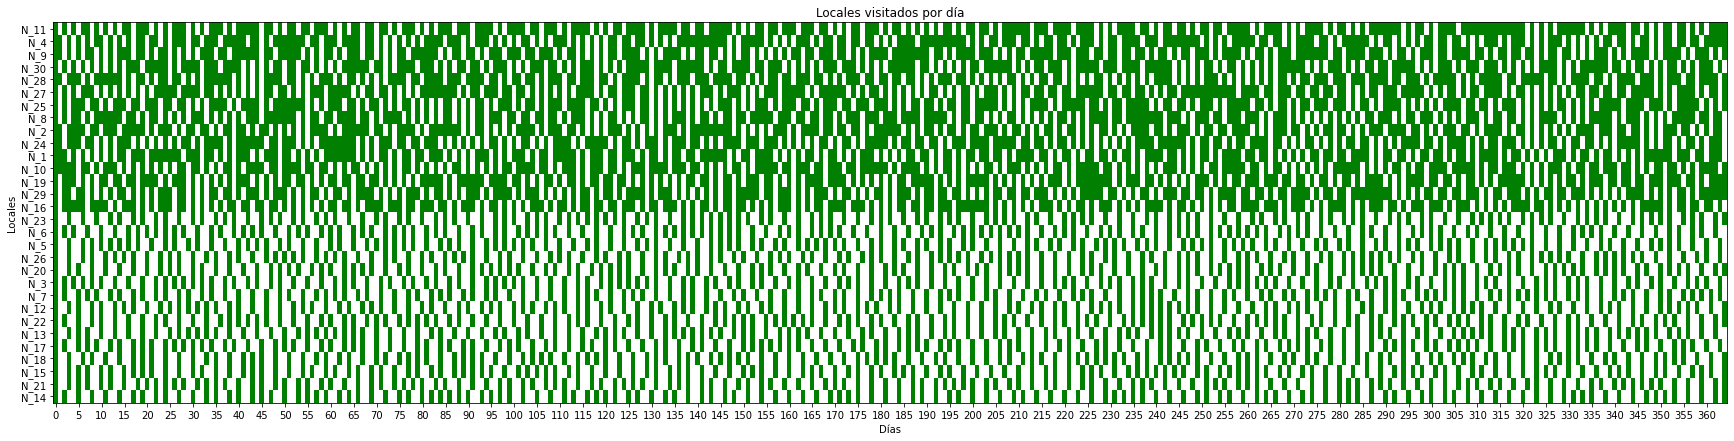

Listo n30empty.xlsx
Inventario inicial: 
N_0 3773
N_1 40
N_2 24
N_3 120
N_4 77
N_5 124
N_6 82
N_7 128
N_8 56
N_9 16
N_10 36
N_11 44
N_12 196
N_13 86
N_14 84
N_15 70
N_16 55
N_17 158
N_18 164
N_19 46
N_20 48
N_21 98
N_22 36
N_23 64
N_24 64
N_25 48
N_26 56
N_27 14
N_28 37
N_29 98
N_30 96


No hay locales que visitar
Ruta 1:  ['N_0', 'N_24', 'N_1', 'N_20', 'N_11', 'N_28', 'N_30', 'N_27', 'N_5', 'N_21', 'N_2', 'N_29', 'N_4', 'N_13', 'N_9', 'N_8', 'N_16', 'N_19', 'N_25', 'N_15', 'N_17', 'N_10', 'N_0']
Ruta 2:  ['N_0', 'N_26', 'N_10', 'N_7', 'N_23', 'N_6', 'N_25', 'N_14', 'N_8', 'N_9', 'N_2', 'N_18', 'N_27', 'N_12', 'N_30', 'N_28', 'N_3', 'N_22', 'N_4', 'N_0']
Ruta 3:  ['N_0', 'N_24', 'N_1', 'N_4', 'N_29', 'N_2', 'N_27', 'N_19', 'N_25', 'N_16', 'N_30', 'N_28', 'N_11', 'N_10', 'N_0']
Ruta 4:  ['N_0', 'N_24', 'N_3', 'N_11', 'N_10', 'N_7', 'N_17', 'N_15', 'N_6', 'N_25', 'N_8', 'N_9', 'N_13', 'N_4', 'N_29', 'N_21', 'N_18', 'N_27', 'N_12', 'N_5', 'N_20', 'N_1', 'N_26', 'N_0']
Ruta 5:  ['N_0', 'N_

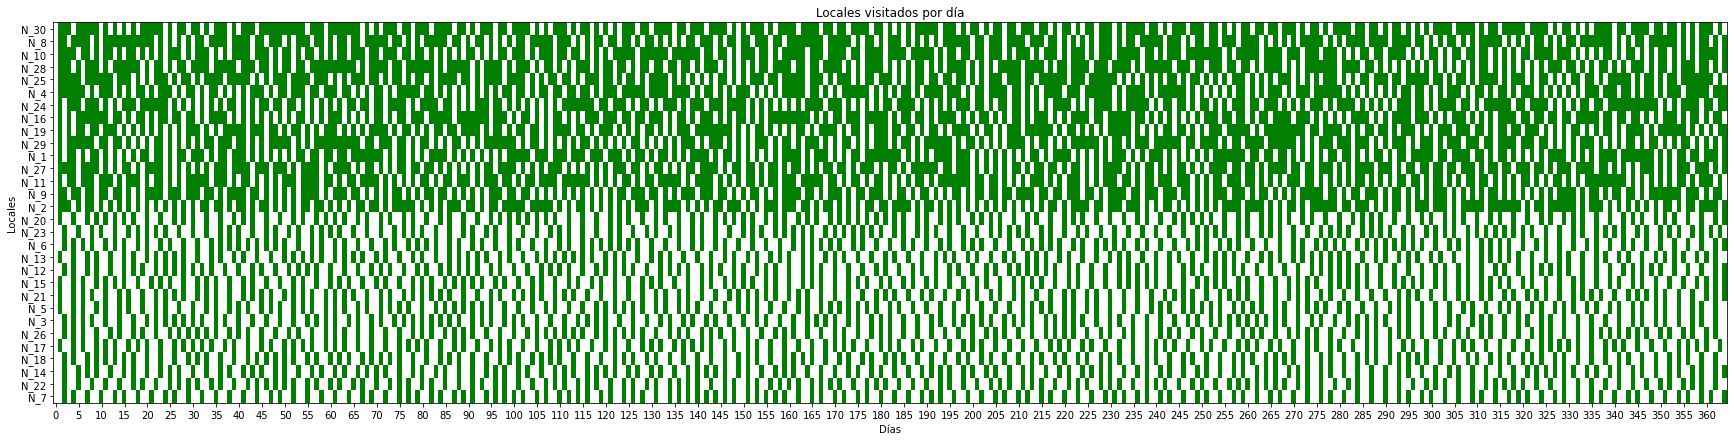

Listo n30estandar.xlsx
Inventario inicial: 
N_0 3773
N_1 80
N_2 48
N_3 180
N_4 154
N_5 186
N_6 123
N_7 192
N_8 112
N_9 32
N_10 72
N_11 88
N_12 294
N_13 129
N_14 126
N_15 105
N_16 110
N_17 237
N_18 246
N_19 92
N_20 72
N_21 147
N_22 54
N_23 96
N_24 128
N_25 96
N_26 84
N_27 28
N_28 74
N_29 196
N_30 192


No hay locales que visitar
Ruta 1:  ['N_0', 'N_24', 'N_10', 'N_11', 'N_27', 'N_9', 'N_4', 'N_0']
Ruta 2:  ['N_0', 'N_1', 'N_26', 'N_10', 'N_7', 'N_28', 'N_30', 'N_17', 'N_18', 'N_2', 'N_21', 'N_22', 'N_4', 'N_29', 'N_9', 'N_8', 'N_19', 'N_25', 'N_16', 'N_23', 'N_0']
Ruta 3:  ['N_0', 'N_24', 'N_20', 'N_3', 'N_5', 'N_12', 'N_27', 'N_2', 'N_29', 'N_4', 'N_13', 'N_9', 'N_14', 'N_19', 'N_6', 'N_15', 'N_30', 'N_28', 'N_11', 'N_10', 'N_0']
Ruta 4:  ['N_0', 'N_10', 'N_7', 'N_28', 'N_17', 'N_25', 'N_19', 'N_16', 'N_8', 'N_18', 'N_29', 'N_4', 'N_21', 'N_26', 'N_1', 'N_0']
Ruta 5:  ['N_0', 'N_1', 'N_20', 'N_24', 'N_11', 'N_28', 'N_30', 'N_5', 'N_22', 'N_29', 'N_2', 'N_9', 'N_27', 'N_12', 'N_15', 'N_

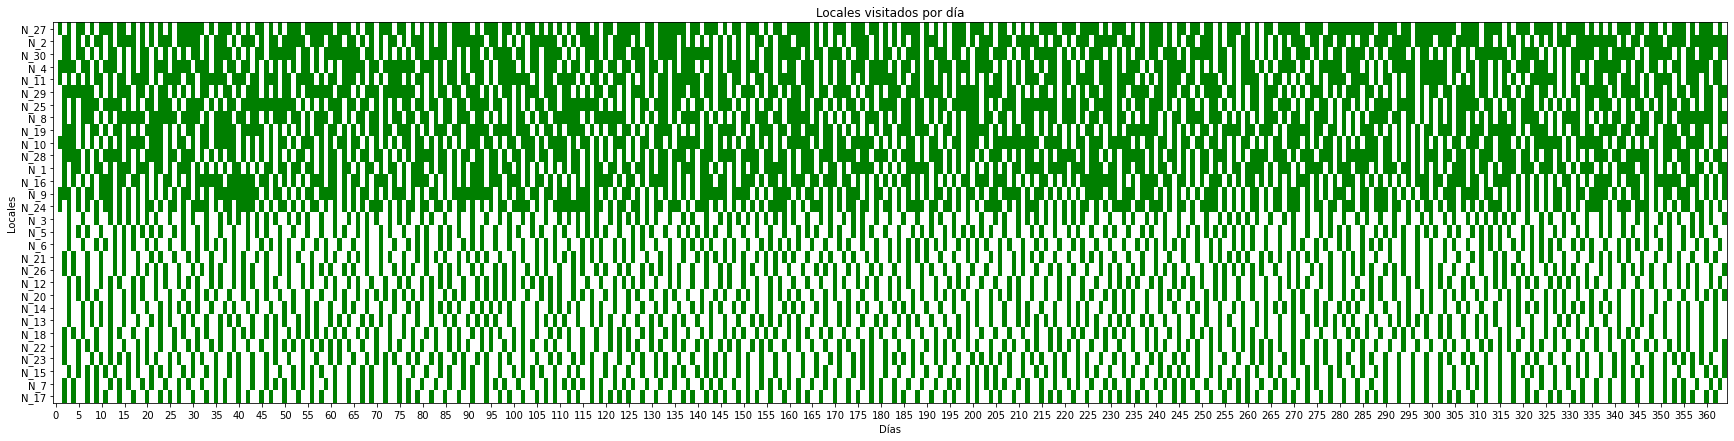

Listo n30full.xlsx


In [3]:
n_s = [10,20,30]
inicial = ['empty', 'estandar', 'full']
datos_R = {}
for n in n_s:
    for i in inicial:
        file_name = f'n{n}{i}.xlsx'
        output = f'plots//tablero_n{n}_{i}.png'
        G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
        historia = simular_demanda_previa(G, dist = 'n', T=1000)
        rutas_R, perdidas_R, inventarios_R = simular_ejecucion_R(grafo_inicial = G, T = 365)
        datos_R[f'n{n}{i}'] = {'rutas': rutas_R, 'perdidas': perdidas_R, 'inventarios': inventarios_R}
        N = len(G.nodes())-1
        df = generar_df(rutas_R, N)
        plotear_tablero_visitas(df, guardar = True, nombre = output)
        print (f'Listo {file_name}')



        

In [5]:
datos_R

{'n10empty': {'rutas': {0: ['N_0',
    'N_4',
    'N_10',
    'N_9',
    'N_2',
    'N_1',
    'N_3',
    'N_7',
    'N_6',
    'N_8',
    'N_5',
    'N_0'],
   1: ['N_0', 'N_2', 'N_1', 'N_0'],
   2: ['N_0', 'N_4', 'N_9', 'N_1', 'N_3', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'],
   3: ['N_0', 'N_10', 'N_2', 'N_6', 'N_0'],
   4: ['N_0', 'N_4', 'N_9', 'N_1', 'N_3', 'N_6', 'N_0'],
   5: ['N_0', 'N_2', 'N_1', 'N_7', 'N_6', 'N_8', 'N_5', 'N_0'],
   6: ['N_0', 'N_4', 'N_10', 'N_9', 'N_0'],
   7: ['N_0', 'N_9', 'N_2', 'N_1', 'N_3', 'N_6', 'N_5', 'N_0'],
   8: ['N_0', 'N_4', 'N_9', 'N_6', 'N_8', 'N_7', 'N_0'],
   9: ['N_0', 'N_10', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0'],
   10: ['N_0', 'N_4', 'N_9', 'N_1', 'N_3', 'N_6', 'N_8', 'N_5', 'N_0'],
   11: ['N_0', 'N_10', 'N_2', 'N_1', 'N_7', 'N_6', 'N_0'],
   12: ['N_0', 'N_4', 'N_9', 'N_6', 'N_0'],
   13: ['N_0', 'N_4', 'N_5', 'N_8', 'N_7', 'N_3', 'N_1', 'N_2', 'N_0'],
   14: ['N_0', 'N_10', 'N_9', 'N_2', 'N_1', 'N_6', 'N_0'],
   15: ['N_0', 'N_4', 'N_5', 'N_8'

In [7]:
datos_P = {}
for n in n_s:
    for i in inicial:
        file_name = f'n{n}{i}.xlsx'
        output = f'plots//tablero_PRO_n{n}_{i}.png'
        G, ubis, cap_tpte, info_locales = crear_grafo_inicial(archivo= file_name ,plot=False)
        historia = simular_demanda_previa(G, dist = 'n', T=1000)
        rutas_P, perdidas_P, inventarios_P = simular_ejecucion_P_LS(grafo_inicial = G, T = 365)
        datos_P[f'n{n}{i}'] = {'rutas': rutas_P, 'perdidas': perdidas_P, 'inventarios': inventarios_P}
        N = len(G.nodes())-1
        df = generar_df(rutas_P, N)
        plotear_tablero_visitas(df, guardar = True, nombre = output)
        print (f'Listo {file_name}')


TypeError: simular_ejecucion_P_LS() missing 2 required positional arguments: 'cap' and 'dem_historico'